In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
# 신경망 - 정규화
from sklearn.preprocessing import MinMaxScaler

# X = 100x2, y = 100
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)

# 값의 범위가 다름
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(y.reshape(100,1)) # 행으로 만들어서
X = scalarX.transform(X)
y = scalarY.transform(y.reshape(100,1))

# Keras Model
model = Sequential()
# Dense -> FFNN망
# layer 3개(layer depth)
# 가중치 : 2x4 => 결과 : 100x4
model.add(Dense(4, input_dim=2, activation='relu')) # 가중치 생성(출력차수(=4)만 지정해주면)
# 100x4 4x4 100x4
model.add(Dense(4, activation='relu'))
# 100x4 4x1 100x1
model.add(Dense(1, activation='linear')) # linear:예측
# mse, cross entropy(분류), KL-divergence(분포비교)
model.compile(loss='mse', optimizer='adam') # tensorflow 모델을 변환(backend=tensorflow)
model.fit(X, y, epochs=1000, verbose=0)

Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
Xnew = scalarX.transform(Xnew)
ynew = model.predict(Xnew)

for i in range(len(Xnew)):
    print("입력데이터=%s, 예측결과=%s" %(Xnew[i], ynew[i]))

Using TensorFlow backend.



입력데이터=[0.29466096 0.30317302], 예측결과=[0.17335463]
입력데이터=[0.39445118 0.79390858], 예측결과=[0.74470896]
입력데이터=[0.02884127 0.6208843 ], 예측결과=[0.40309572]


In [2]:
from keras.models import Sequential # input 1개, output 1개인 망
from keras.layers import Dense
import numpy

numpy.random.seed(7)
dataset = numpy.loadtxt("pima.data", delimiter=",")
X = dataset[:, 0:8] # 8개 독립변수
Y = dataset[:, 8]   # 종속변수

model = Sequential()
# ?x8 8x12(가중치) => ?x12
model.add(Dense(12, input_dim=8, kernel_initializer="uniform", activation="relu"))
# ?x12 12x8(가중치) => ?x8
model.add(Dense(8, kernel_initializer="uniform", activation="relu"))
# ?x8 8x1(가중치) => ?x1
model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid")) # sigmoid:분류, 0.5기준으로
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) # metrics:무엇을 측정하겠는가
# validation_split
#  : 데이터를 분리 입력(train,test)할 때, test도 과적합
#  : train, validation, test으로 나눔
history = model.fit(X, Y, epochs=150, batch_size=10, validation_split=0.33)
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 649us/step - loss: 0.6796 - accuracy: 0.6401 - val_loss: 0.6586 - val_accuracy: 0.6732
Epoch 2/150
514/514 [==============================] - 0s 108us/step - loss: 0.6688 - accuracy: 0.6401 - val_loss: 0.6533 - val_accuracy: 0.6732
Epoch 3/150
514/514 [==============================] - 0s 107us/step - loss: 0.6616 - accuracy: 0.6401 - val_loss: 0.6510 - val_accuracy: 0.6732
Epoch 4/150
514/514 [==============================] - 0s 104us/step - loss: 0.6545 - accuracy: 0.6401 - val_loss: 0.6455 - val_accuracy: 0.6850
Epoch 5/150
514/514 [==============================] - 0s 111us/step - loss: 0.6456 - accuracy: 0.6420 - val_loss: 0.6361 - val_accuracy: 0.7047
Epoch 6/150
514/514 [==============================] - 0s 110us/step - loss: 0.6402 - accuracy: 0.6479 - val_loss: 0.6239 - val_accurac

514/514 [==============================] - 0s 106us/step - loss: 0.5308 - accuracy: 0.7276 - val_loss: 0.5526 - val_accuracy: 0.7559
Epoch 55/150
514/514 [==============================] - 0s 109us/step - loss: 0.5291 - accuracy: 0.7296 - val_loss: 0.5529 - val_accuracy: 0.7244
Epoch 56/150
514/514 [==============================] - 0s 110us/step - loss: 0.5392 - accuracy: 0.7335 - val_loss: 0.5595 - val_accuracy: 0.7480
Epoch 57/150
514/514 [==============================] - 0s 113us/step - loss: 0.5413 - accuracy: 0.7354 - val_loss: 0.5659 - val_accuracy: 0.7244
Epoch 58/150
514/514 [==============================] - 0s 110us/step - loss: 0.5287 - accuracy: 0.7335 - val_loss: 0.5705 - val_accuracy: 0.6929
Epoch 59/150
514/514 [==============================] - 0s 114us/step - loss: 0.5403 - accuracy: 0.7296 - val_loss: 0.5523 - val_accuracy: 0.7402
Epoch 60/150
514/514 [==============================] - 0s 110us/step - loss: 0.5326 - accuracy: 0.7257 - val_loss: 0.5455 - val_accuracy

514/514 [==============================] - 0s 109us/step - loss: 0.5019 - accuracy: 0.7451 - val_loss: 0.5507 - val_accuracy: 0.7323
Epoch 111/150
514/514 [==============================] - 0s 109us/step - loss: 0.5160 - accuracy: 0.7315 - val_loss: 0.5246 - val_accuracy: 0.7480
Epoch 112/150
514/514 [==============================] - 0s 114us/step - loss: 0.5016 - accuracy: 0.7432 - val_loss: 0.5304 - val_accuracy: 0.7362
Epoch 113/150
514/514 [==============================] - 0s 113us/step - loss: 0.5051 - accuracy: 0.7432 - val_loss: 0.5166 - val_accuracy: 0.7638
Epoch 114/150
514/514 [==============================] - 0s 109us/step - loss: 0.5000 - accuracy: 0.7412 - val_loss: 0.5170 - val_accuracy: 0.7677
Epoch 115/150
514/514 [==============================] - 0s 110us/step - loss: 0.5016 - accuracy: 0.7529 - val_loss: 0.5177 - val_accuracy: 0.7677
Epoch 116/150
514/514 [==============================] - 0s 105us/step - loss: 0.5033 - accuracy: 0.7451 - val_loss: 0.5121 - val_ac

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


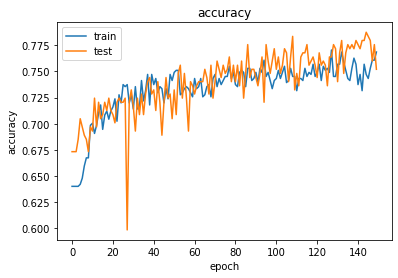

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# 기본 'loss', 'accuracy'
# validation_split하면 'val_loss', 'val_accuracy', 'loss', 'accuracy'
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

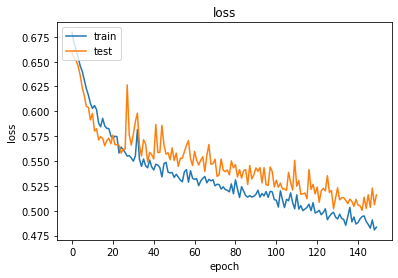

In [4]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [5]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)
print(X.shape) # 1000 x 2
print(Y.shape)

(1000, 2)
(1000,)


[Text(0, 0.5, 'Y'),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'history classification')]

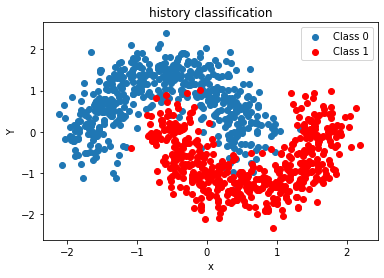

In [6]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label="Class 0")
ax.scatter(X[Y==1, 0], X[Y==1, 1], color="r", label="Class 1")
ax.legend()
ax.set(xlabel="x", ylabel="Y", title="history classification")

In [7]:
import keras
# 비선형일 때 신경망을 사용한다.
model = Sequential()
# 입력데이터 1000x2 2x32 => 1000x32 (차원확대 2->32 => 설명이 잘된다)
model.add(Dense(32, input_dim=2, activation="relu"))
# 1000x32 32x1 = 33 + bias1개 = 34 => 1000x1(분류)
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="AdaDelta", loss="binary_crossentropy", metrics=["accuracy"])

# callback함수 : winodows에서 event후에 자동으로 호출되어지는 함수
# graph image 출력
tb_callback = keras.callbacks.TensorBoard(log_dir="./Graph/model_1/",
                                          histogram_freq=100,
                                          write_graph=True,
                                          write_images=False)
tb_callback.set_model(model) # callback함수를 model에 등록

In [8]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=200, verbose=0, validation_data=(X_test, Y_test), callbacks=[tb_callback])

In [9]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.12789358568191528
Test accuracy: 0.949999988079071


In [10]:
keras.utils.print_summary(model)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


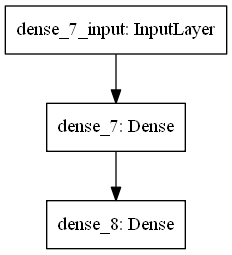

In [12]:
keras.utils.plot_model(model)

In [13]:
%matplotlib inline
from keras.utils.vis_utils import model_to_dot
model_to_dot(model)

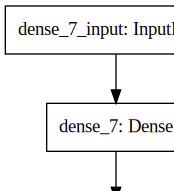

In [14]:
from IPython.display import Image, SVG
SVG(model_to_dot(model).create(prog="dot", format="svg"))

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [16]:
from keras.datasets import mnist
import matplotlib.pylab as plt
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, X_train0.dtype) # (60000, 28x28)
print(y_train0.shape, y_train0.dtype) # (60000,)
print(X_test0.shape, X_test0.dtype)   # (10000, 28x28)
print(y_test0.shape, y_test0.dtype)   # (10000,)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


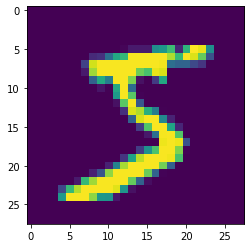

In [17]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show()

In [18]:
# fully-connected : flatten <- FFNN은 데이터가 한줄로
# 이미지 정규화 : 0~255의 컬러값을 갖기때문에 '/255' 하면은 => 0~1
X_train = X_train0.reshape(60000, 784).astype("float32") / 255.0
X_test = X_test0.reshape(10000, 784).astype("float32") / 255.0
print(X_train.shape, X_train.dtype) # 60000 x 784

(60000, 784) float32


In [19]:
# multi-label일 경우에 softmax
# 경우의 수에 대한 확률값
y_train0[:5] # one-hot-encoding여부 = X (5, 0, 4, 1, 9)

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
# one-hot-encoding
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [21]:
import numpy as np
from keras.optimizers import SGD

np.random.seed(0)
model = Sequential()
# 60000 x 784, 784 x 15 => 60000 x 15
###### 1번
#model.add(Dense(15, input_dim=784, activation="sigmoid"))

###### 2번(문제.출력차수가 512인 레이어를 추가하시요.)
model.add(Dense(512, input_dim=784, activation="sigmoid"))
model.add(Dense(15))

# 60000 x 15, 15 x 10 => 60000 x 10
model.add(Dense(10, activation="sigmoid"))
# lr = Learning Rate
# SGD(Stochastic Gradient Descent)
model.compile(optimizer=SGD(lr=0.2), loss="mean_squared_error", metrics=["accuracy"])

In [22]:
model.layers

In [23]:
l1 = model.layers[0]
l2 = model.layers[1]
#레이어 속성으로 정보 확인
l1.name
l1.input_shape
l1.output_shape

(None, 512)

In [24]:
# Callback Class
# custom callback함수의 제장
# Callback function : 함수에 의해서 호출되는 객체(함수)
class CustomHistory(keras.callbacks.Callback): # keras.callbacks.Callback을 상속받는다.
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
    def on_epoch_end(self, batch, logs={}): # overriding
        self.train_loss.append(logs.get("loss"))
        self.val_loss.append(logs.get("val_loss"))
        self.train_acc.append(logs.get("accuracy"))
        self.val_acc.append(logs.get("val_accuracy"))

C:\Users\ICT01_15\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 0.1022 - accuracy: 0.1207 - val_loss: 0.0894 - val_accuracy: 0.1868
Epoch 2/30
 - 1s - loss: 0.0889 - accuracy: 0.2013 - val_loss: 0.0884 - val_accuracy: 0.2180
Epoch 3/30
 - 1s - loss: 0.0880 - accuracy: 0.2581 - val_loss: 0.0874 - val_accuracy: 0.3206
Epoch 4/30
 - 1s - loss: 0.0870 - accuracy: 0.3395 - val_loss: 0.0863 - val_accuracy: 0.3785
Epoch 5/30
 - 1s - loss: 0.0858 - accuracy: 0.3882 - val_loss: 0.0850 - val_accuracy: 0.4014
Epoch 6/30
 - 1s - loss: 0.0845 - accuracy: 0.4065 - val_loss: 0.0836 - val_accuracy: 0.4366
Epoch 7/30
 - 1s - loss: 0.0831 - accuracy: 0.4326 - val_loss: 0.0821 - val_accuracy: 0.4714
Epoch 8/30
 - 1s - loss: 0.0815 - accuracy: 0.4549 - val_loss: 0.0804 - val_accuracy: 0.4979
Epoch 9/30
 - 1s - loss: 0.0798 - accuracy: 0.4837 - val_loss: 0.0786 - val_accuracy: 0.5107
Epoch 10/30
 - 1s - loss: 0.0779 - accuracy: 0.5049 - val_loss: 0.0767 - val_accuracy: 0.5277
Epoch 11/30
 - 1s -

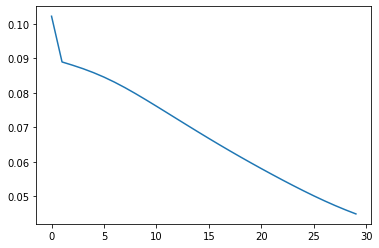

In [25]:
# callback function 사용
custom_hist = CustomHistory()
custom_hist.init()

hist = model.fit(X_train, Y_train,
                 nb_epoch=30,
                 batch_size=1000,
                 validation_data=(X_test, Y_test),
                 verbose=2,
                 callbacks=[custom_hist])
plt.plot(hist.history["loss"])
plt.show()

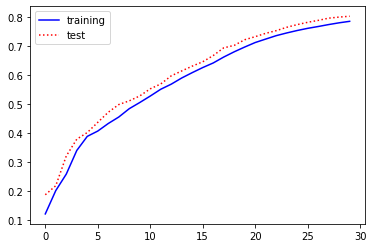

{'batch_size': 1000, 'epochs': 30, 'steps': None, 'samples': 60000, 'verbose': 2, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0.120683335, 0.20128334, 0.25806665, 0.33955, 0.3882, 0.40651667, 0.43256667, 0.4549, 0.48371667, 0.50495, 0.52725, 0.5507333, 0.5683, 0.58963335, 0.60805, 0.62555, 0.64141667, 0.66181666, 0.6799333, 0.69638336, 0.7119167, 0.7238333, 0.7356, 0.7449167, 0.75338334, 0.76088333, 0.76715, 0.77388334, 0.77996665, 0.78508335]
0.8026000261306763


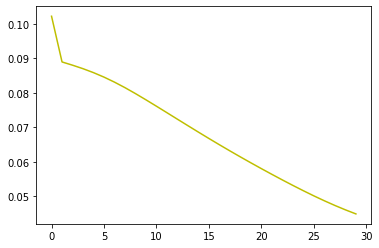

In [26]:
plt.plot(hist.history["accuracy"], "b-", label="training")
plt.plot(hist.history["val_accuracy"], "r:", label="test")
plt.legend()
plt.show()

print(hist.model)
print(hist.params)
print(hist.history["accuracy"])
print(hist.history["val_accuracy"][29])
plt.show()
plt.plot(custom_hist.train_loss, "y", label="train loss")
plt.show()

In [27]:
# 문제. X_test의 이미지 한장의 label을 예측해보시요.
model.predict(X_test[:1, :]) # 결과 - 10개의 확률값으로 나옴

array([[0.09661809, 0.01256534, 0.0857769 , 0.02382597, 0.088494  ,
        0.06951162, 0.06905296, 0.7364791 , 0.0355393 , 0.05977838]],
      dtype=float32)

In [28]:
model.predict_classes(X_test[:1, :], verbose=0) # 

array([7], dtype=int64)

In [29]:
# 출력차수가 512인 레이어를 추가하시요.(위에 있음)

In [30]:
# boston 집값 예측
from keras.datasets import boston_housing
# x_train : 404 x 13, y_train : 404
# x_test : 102 x 13, t_test : 102
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
num_features = 13

In [31]:
model = Sequential()
model.add(Dense(1, input_dim=num_features, activation="linear"))

In [32]:
model.summary()
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
404/404 [==============================] - 0s 763us/step - loss: 28031.2535 - mae: 127.1642
Epoch 2/10
404/404 [==============================] - 0s 523us/step - loss: 3554.3965 - mae: 46.6836
Epoch 3/10
404/404 [==============================] - 0s 531us/step - loss: 1257.6941 - mae: 27.5113
Epoch 4/10
404/404 [==============================] - 0s 535us/step - loss: 298.5174 - mae: 12.8495
Epoch 5/10
404/404 [==============================] - 0s 531us/step - loss: 140.4095 - mae: 8.7667
Epoch 6/10
404/404 [==============================] - 0s 581us/step - loss: 126.6947 - mae: 8.0275
Epoch 7/10
404/404 [=============================

In [33]:
# accuracy
mse, mae = model.evaluate(x_test, y_test, verbose=False)
rmse = np.sqrt(mse)
mse, rmse, mae

(80.5265775194355, 8.973660207486994, 6.593564033508301)

In [34]:
# 문제. X_test의 앞의 3개의 집을 예측하시요.
pred = model.predict(x_test[:3, :])
pred

array([[ 8.539897],
       [19.76989 ],
       [27.80211 ]], dtype=float32)

In [35]:
real = y_test[:3]
real

array([ 7.2, 18.8, 19. ])

In [36]:
# 상관계수를 확인하시요.
import numpy as np
np.corrcoef(pred.reshape(3), real)

array([[1.        , 0.91582434],
       [0.91582434, 1.        ]])

In [ ]:
#########내가 한거

In [47]:
# scikits - keras 연결 => KerasClassifier, KerasRegressor
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [52]:
# 입력768x9 => (768,8), (768,1) 종속변수
# 변수 8개
def create_model():
    model = Sequential()
    # 8x12(가중치) => 768x12
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dropout(dropoup_rate))
    # 768x12 => 768x1
    model.add(Dense(1, kernel_initializer=init_mode, activation="sigmoid")) # 0~1사이의 값으로
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

seed = 7
numpy.random.seed(seed)
dataset = numpy.loadtxt("pima.csv", delimiter=",")

X = dataset[:, 0:8]
Y = dataset[:, 8]
#create model
#Earlystopping
from keras.callbacks import EarlyStopping
stopper=EarlyStopping(monitor='val_accuracy',patience=3,verbose=1)
#model = KerasClassifier(build_fn=create_model, verbose=0)
model=KerasClassifier(build_fn=create_model,epochs=100,batch_size=40)

In [53]:
# parameter 조합 만들기
#batch_size = [10, 20, 40, 60, 80, 100]
#epochs = [10, 50, 100]

dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
init_mode=['uniform','lecun_uniform','normal','zero','glorot_normal','glorot_uniform','he_normal','he_uniform']
activation=['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear']
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1) # n_jobs:참여하는 CPU개수(-1=전부)
fit_params=dict(callbacks=[stopper])
#변동매개변수 (여러개가 전달될때)list= *, dict=**
grid_result = grid.fit(X, Y,**fit_params)

#summarize results
print("최적스코어: %f 사용한 파라미터 조합 : %s" %(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" %(mean, stdev, param))

C:\Users\ICT01_15\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


NameError: name 'Dropout' is not defined

In [40]:
# 문제.
# 1) dense2에 가중치 초기화 매개변수를 넣어주고, 가장 최적의 가중치 초기화 파라미터를 결정하시요.
# 가중치 초기화 매개변수 -> kenel_initializer
['uniform','lecun_uniform','normal','zero','glorot_normal','glorot_uniform','he_normal','he_uniform']

# 2) dense1에는 activation함수를 넣어주고, 가장 좋은 activation함수를 결정하시요.
['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear']

In [41]:
keras.__version__

'2.3.1'

In [42]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [46]:
#1
#init_mode=['uniform','lecun_uniform','normal','zero','glorot_normal','glorot_uniform','he_normal','he_uniform']
#activation=['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear']
#param_grid = dict(batch_size=batch_size, epochs=epochs)
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1) # n_jobs:참여하는 CPU개수(-1=전부)
#grid_result = grid.fit(X, Y)
#print("최적스코어: %f      사용한 파라미터 조합 : %s" %(grid_result.best_score_,grid_result.best_params_))
#means = grid_result.cv_results_["mean_test_score"]
#stds = grid_result.cv_results_["std_test_score"]
#params = grid_result.cv_results_["params"]
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" %(mean, stdev, param))

ValueError: ('Could not interpret activation function identifier:', ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

In [ ]:
##################다시########

In [54]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
stopper = EarlyStopping(monitor='var_accuracy', patience=3, verbose=1)
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform',optimizer='relu',dropout_rate=0.1):
# create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation=optimizer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
# Earlystopping
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=1)
# define the grid search parameters
dropout_rate=[0.1,0.2,0.3] # ,0.4,0.5,0.6,0.7,0.8,0.9
init_mode = ['uniform', 'lecun_uniform']# ,'normal','zero','glorot_normal','glorot_uniform','he_normal','he_uniform'
optimizer = ['softmax','relu'] #, 'softplus', 'softsign','tanh','sigmoid','hard_sigmoid','linear'
param_grid = dict(init_mode=init_mode,optimizer=optimizer,dropout_rate=dropout_rate)
fit_params = dict(callbacks=[stopper])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# 변동 매개변수
grid_result = grid.fit(X, Y, **fit_params)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\ICT01_15\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/100
768/768 [==============================] - 0s 457us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 2/100
768/768 [==============================] - 0s 97us/step - loss: 3.2521 - accuracy: 0.5807
Epoch 3/100
768/768 [==============================] - 0s 97us/step - loss: 0.7907 - accuracy: 0.6354
Epoch 4/100
 10/768 [..............................] - ETA: 0s - loss: 0.9570 - accuracy: 0.5000

C:\Users\ICT01_15\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `var_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


768/768 [==============================] - 0s 92us/step - loss: 0.6842 - accuracy: 0.6471
Epoch 5/100
768/768 [==============================] - 0s 88us/step - loss: 0.7030 - accuracy: 0.6549
Epoch 6/100
768/768 [==============================] - 0s 93us/step - loss: 0.6643 - accuracy: 0.6667
Epoch 7/100
768/768 [==============================] - 0s 96us/step - loss: 0.7011 - accuracy: 0.6237
Epoch 8/100
768/768 [==============================] - 0s 99us/step - loss: 0.6822 - accuracy: 0.6562
Epoch 9/100
768/768 [==============================] - 0s 100us/step - loss: 0.6783 - accuracy: 0.6523
Epoch 10/100
768/768 [==============================] - 0s 110us/step - loss: 0.6504 - accuracy: 0.6641
Epoch 11/100
768/768 [==============================] - 0s 90us/step - loss: 0.6593 - accuracy: 0.6680
Epoch 12/100
768/768 [==============================] - 0s 88us/step - loss: 0.6622 - accuracy: 0.6549
Epoch 13/100
768/768 [==============================] - 0s 88us/step - loss: 0.6562 - acc

768/768 [==============================] - 0s 90us/step - loss: 0.5836 - accuracy: 0.6979
Epoch 84/100
768/768 [==============================] - 0s 87us/step - loss: 0.5651 - accuracy: 0.7122
Epoch 85/100
768/768 [==============================] - 0s 87us/step - loss: 0.5844 - accuracy: 0.6992
Epoch 86/100
768/768 [==============================] - 0s 87us/step - loss: 0.5685 - accuracy: 0.7135
Epoch 87/100
768/768 [==============================] - 0s 86us/step - loss: 0.5655 - accuracy: 0.7240
Epoch 88/100
768/768 [==============================] - 0s 88us/step - loss: 0.5580 - accuracy: 0.7214
Epoch 89/100
768/768 [==============================] - 0s 88us/step - loss: 0.6146 - accuracy: 0.7188
Epoch 90/100
768/768 [==============================] - 0s 88us/step - loss: 0.5747 - accuracy: 0.7057
Epoch 91/100
768/768 [==============================] - 0s 87us/step - loss: 0.5749 - accuracy: 0.7148
Epoch 92/100
768/768 [==============================] - 0s 87us/step - loss: 0.5690 - 

In [ ]:
#회귀

In [74]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas

In [82]:
dataframe=pandas.read_csv('housing.csv',delim_whitespace=True,header=None)
dataset=dataframe.values
X=dataset[:,0:13]
Y=dataset[:,13] #reshape
print(X.shape)

(506, 13)


In [89]:
#추가: 모델을 바꿔주면 


In [ ]:
#추가

In [96]:
#baseline_model 보다 deep 해짐
def larger_model():
    model=Sequential() 
    #506 x 13 13x13 506x13           #hyperparameter 뭐가 좋은지는 데이터에 따라 다르다 
    model.add(Dense(13,input_dim=13,kernel_initializer='normal',activation='relu'))
    #506 x 13 13x1  506x1
    model.add(Dense(1,kernel_initializer='normal'))
    model.compile(loss='mean_squared_error',optimizer='adam') #여기까지만 정의해준다
    return model

In [97]:
seed=7
numpy.random.seed(seed)
estimator=KerasRegressor(build_fn=larger_model,nb_epoch=100,batch_size=5,verbose=0)

#결과:

In [115]:
def baseline_model(): #모델안에있는 덴스에서는 줘야한다?
    model=Sequential() 
    #506 x 13 13x13 506x13           #hyperparameter 뭐가 좋은지는 데이터에 따라 다르다 
    model.add(Dense(13,input_dim=13,kernel_initializer='normal',activation='relu'))
    #506 x 13 13x1  506x1
    model.add(Dense(1,kernel_initializer='normal'))
    model.compile(loss='mean_squared_error',optimizer='adam') #여기까지만 정의해준다
    return model

In [116]:
seed=7
numpy.random.seed(seed)
estimator=KerasRegressor(build_fn=baseline_model,nb_epoch=100,batch_size=5,verbose=0)

#nb_epoch ,nb_epoch 는 fitting 할때줌
#결과 results: -114.89 (83.20) MSE, standardized: -29.27 (27.70) MSE 

In [109]:
def wider_model(): #모델안에있는 덴스에서는 줘야한다?
    model=Sequential() 
    #506 x 13 13x13 506x13           #hyperparameter 뭐가 좋은지는 데이터에 따라 다르다 
    model.add(Dense(20,input_dim=13,kernel_initializer='normal',activation='relu'))
    #506 x 13 13x1  506x1
    model.add(Dense(1,kernel_initializer='normal'))
    model.compile(loss='mean_squared_error',optimizer='adam') #여기까지만 정의해준다
    return model

In [110]:
seed=7
numpy.random.seed(seed)
estimator=KerasRegressor(build_fn=wider_model,nb_epoch=100,batch_size=5,verbose=0)

#results: -101.97 (72.19) MSE
#standardized: -29.48 (27.69) MSE

In [117]:
#10개중 한개는 validation: 검증용
kfold=KFold(n_splits=10,random_state=seed)
results=cross_val_score(estimator, X,Y,cv=kfold) #모델을 돌리지도 않았는데 평가를? 매개변수에 데이터를 던져줌, 
print('results: %.2f (%.2f) MSE' % (results.mean(),results.std()))

results: -114.57 (82.69) MSE


In [118]:
numpy.random.seed(seed)
estimators=[]
estimators.append(('standadize',StandardScaler()))
estimators.append(('mlp',KerasRegressor(build_fn=baseline_model,epochs=50, batch_size=5,verbose=0))) #KerasRegressor 는 매개변수로 딕셔너리를 요구
pipeline=Pipeline(estimators) #파이프라인의 매개 변수가 리스트를 요구 
kfold=KFold(n_splits=10, random_state=seed)
results=cross_val_score(pipeline,X,Y,cv=kfold)
print('standardized: %.2f (%.2f) MSE' % (results.mean(),results.std()))

standardized: -29.49 (27.67) MSE


In [119]:
pipeline.fit(X,Y)

Pipeline(memory=None,
         steps=[('standadize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x000001E243DBE108>)],
         verbose=False)

In [120]:
#예측하려면 파이프라인 자체가 최적의 예측을하고 있음?
res=pipeline.predict(X)
res[0]


29.822124

In [121]:
#평가....? 상관계수로 
np.corrcoef(res,Y)

array([[1.        , 0.91264519],
       [0.91264519, 1.        ]])

In [ ]:
#####호경이###

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas
import numpy

In [ ]:
def baseline_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer="normal", activation="relu"))
    model.add(Dense(1, kernel_initializer="normal"))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

In [ ]:
seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [ ]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
numpy.random.seed(seed)
estimators = []
estimators.append(("standardize", StandardScaler()))
estimators.append(("mlp", KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
pipeline.fit(X, Y)

In [ ]:
#############################################

In [ ]:
#숙제
1.iris.csv 데이터를 로딩한 다음
2.분류를 구성하시오
3.parameter tuning 을 구현하시오(pipeline 사용도 함께)

In [ ]:
dataframe=pandas.read_csv('iris.csv',delim_whitespace=True,header=None)
dataset=dataframe.values

